In [5]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pprint
from sklearn import metrics
precision = 4

In [6]:
# results_dir = "/s/red/b/nobackup/data/eggnog_cpm/training_files/common_train/0814180600pm/testing/results_ep77/"
results_dir = "/s/red/b/nobackup/data/eggnog_cpm/training_files/rmpe_test/test_320x240_v2/testing/results/"
npy_file_pck = 'test_pck_ep0_nTest_5000_time091320181818.npy'
npy_file_pckh = npy_file_pck.replace("pck", "pckh")   # 'test_pckh_ep100_nTest_5000_time091220181226.npy'


# https://stackoverflow.com/a/39566040/6793795
SMALLER_SIZE = 18
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# pck
pck = np.load(os.path.join(results_dir, npy_file_pck))
print("pck\n")
pprint.pprint(pck)
print(pck.shape)
# pck_at = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
pck_at = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 
                       0.20, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36, 0.38, 
                       0.40, 0.42, 0.44, 0.46, 0.48, 0.50]
# pck_at = [0.0, 0.02, 0.04, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# pck_at = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
print("pck_at\n", pck_at)

# pckh
pckh = np.load(os.path.join(results_dir, npy_file_pckh))
print("\npckh\n")
pprint.pprint(pckh)
print(pckh.shape)
pckh_at = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 
                       0.20, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36, 0.38, 
                       0.40, 0.42, 0.44, 0.46, 0.48, 0.50]
# pckh_at = [0.0, 0.02, 0.04, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# pckh_at = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
print("pckh_at\n", pckh_at)


joints = ['Head', 'Spine_Shoulder (Neck)', 'Left Shoulder', 'Left Elbow', 'Left Wrist', 'Right Shoulder', 'Right Elbow', 'Right Wrist', 'Left Hip', 'Right Hip']
print("\njoints", joints)

pck

array([[0.    , 0.092 , 0.2032, 0.3286, 0.5038, 0.6698, 0.7878, 0.8646,
        0.9064, 0.9474, 0.9694, 0.981 , 0.986 , 0.9898, 0.9936, 0.9958,
        0.9974, 0.9996, 0.9998, 0.9998, 1.    , 1.    , 1.    , 1.    ,
        1.    , 1.    ],
       [0.    , 0.2942, 0.6328, 0.8312, 0.9286, 0.9652, 0.9848, 0.9946,
        0.9972, 0.9996, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
        1.    , 1.    ],
       [0.    , 0.0032, 0.0466, 0.2942, 0.7232, 0.8994, 0.9616, 0.98  ,
        0.9912, 0.9974, 0.9992, 0.9996, 1.    , 1.    , 1.    , 1.    ,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
        1.    , 1.    ],
       [0.    , 0.079 , 0.3458, 0.5746, 0.7452, 0.8486, 0.9022, 0.941 ,
        0.9672, 0.983 , 0.9906, 0.994 , 0.9954, 0.9964, 0.9986, 0.999 ,
        0.9996, 0.9998, 0.9998, 0.9998, 0.9998, 0.9998, 0.9998, 0.9998,
        0.9998, 0.9998],
       [0.    , 0.062 , 0.1968,

(5, 2)
i, j 0 0
i, j 0 1
i, j 1 0
i, j 1 1
i, j 2 0
i, j 2 1
i, j 3 0
i, j 3 1
i, j 4 0
i, j 4 1


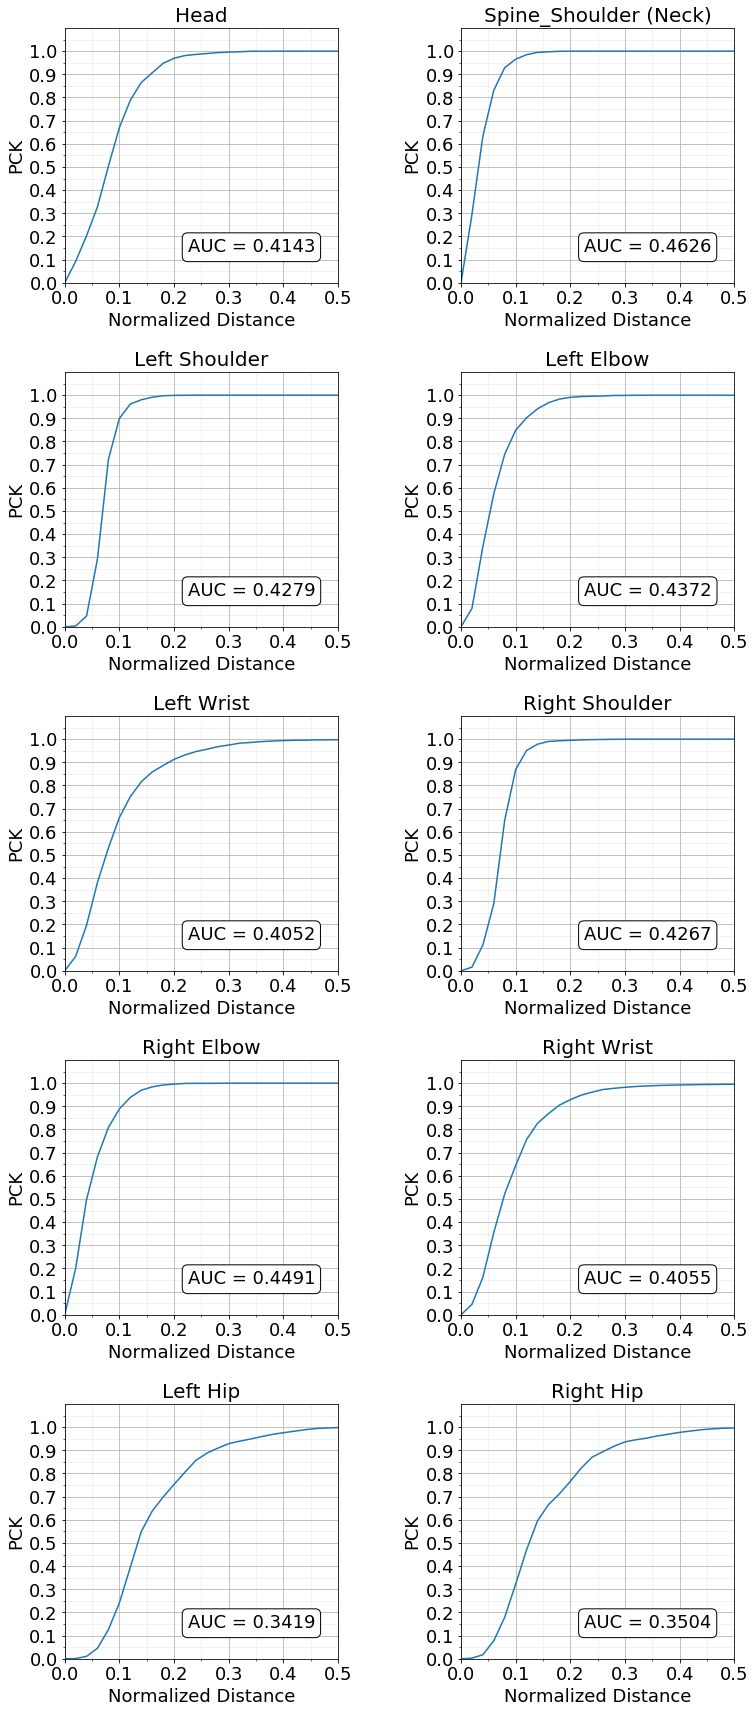

In [7]:
##### pck
fig, ax = plt.subplots(nrows=5, ncols=2)
print(ax.shape)
# ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = ax.flatten()
fig.set_size_inches((12, 30))
fig.subplots_adjust(wspace=0.45)
fig.subplots_adjust(hspace=0.35)

x = pck_at
# x_label = "Normalized Distance"
y_label = "PCK"

# # 1 head
# y = pck[0]
# ax0.plot(x,y)
# # ax0.legend(prop={'size': 10})
# ax0.set(xlabel=x_label, ylabel=y_label, title='Head')
# ax0.grid()

i = -1
for p in range(pck.shape[0]):
    
    j = p%2  # 2 columns
    if j == 0:
        i = i + 1
    print("i, j", i, j)
        
#     j = 0 if p<5 else 1
    
    y = pck[p]
#     ax[p].imshow(np.zeros((10,10)))
    
    # Major ticks every .1, minor ticks every .05
    major_ticks = np.arange(0, 1.1, .1)
    minor_ticks = np.arange(0, 1.1, .05)

    ax[i][j].set_xticks(major_ticks)
    ax[i][j].set_xticks(minor_ticks, minor=True)
    ax[i][j].set_yticks(major_ticks)
    ax[i][j].set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax[i][j].grid(which='both')

    # Or if you want different settings for the grids:
    ax[i][j].grid(which='minor', alpha=0.2)
    ax[i][j].grid(which='major', alpha=0.9)
    
    auc = round(metrics.auc(x, y), precision)
    x_label = "Normalized Distance"  # + " | AUC = " + str(auc)
    
    ax[i][j].plot(x, y)
    ax[i][j].set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title=joints[p])
    ax[i][j].grid(linestyle = '-')
    
    ax[i][j].annotate("AUC = " + str(auc), xy=(0.45, 0.12), xycoords='axes fraction',
             fontsize=SMALLER_SIZE, bbox=dict(boxstyle="round", fc="w"))

    
# fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pck.split('.')[0] + "_individual_joints.png"))

mean pck [0.      0.07954 0.2224  0.3862  0.57184 0.70096 0.78992 0.8515  0.88652
 0.91138 0.93104 0.94794 0.96136 0.96954 0.97632 0.98166 0.98502 0.98748
 0.99004 0.9921  0.9939  0.9954  0.99672 0.9978  0.99836 0.99872] (26,)
Area under the curve 0.4121


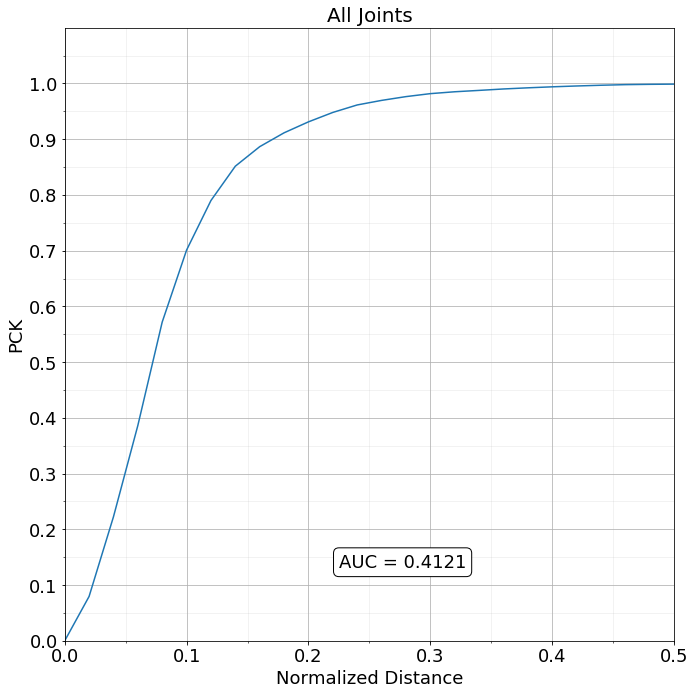

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 10))

x = pck_at

# Major ticks every .1, minor ticks every .05
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .05)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.9)

# 1 all joints
y = np.mean(pck, axis=0)
print("mean pck", y, y.shape)
auc = round(metrics.auc(x, y), precision)
print("Area under the curve", auc)

x_label = "Normalized Distance"  # +  " | AUC = " + str(auc)
y_label = "PCK"

ax.plot(x, y)
ax.set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title='All Joints')
ax.grid(linestyle = '-')

ax.annotate("AUC = " + str(auc), xy=(0.45, 0.12), xycoords='axes fraction',
             fontsize=SMALLER_SIZE, bbox=dict(boxstyle="round", fc="w"))
    
fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pck.split('.')[0] + "_all_AUC_" + str(auc) + ".png"))


(5, 2)
i, j 0 0
i, j 0 1
i, j 1 0
i, j 1 1
i, j 2 0
i, j 2 1
i, j 3 0
i, j 3 1
i, j 4 0
i, j 4 1


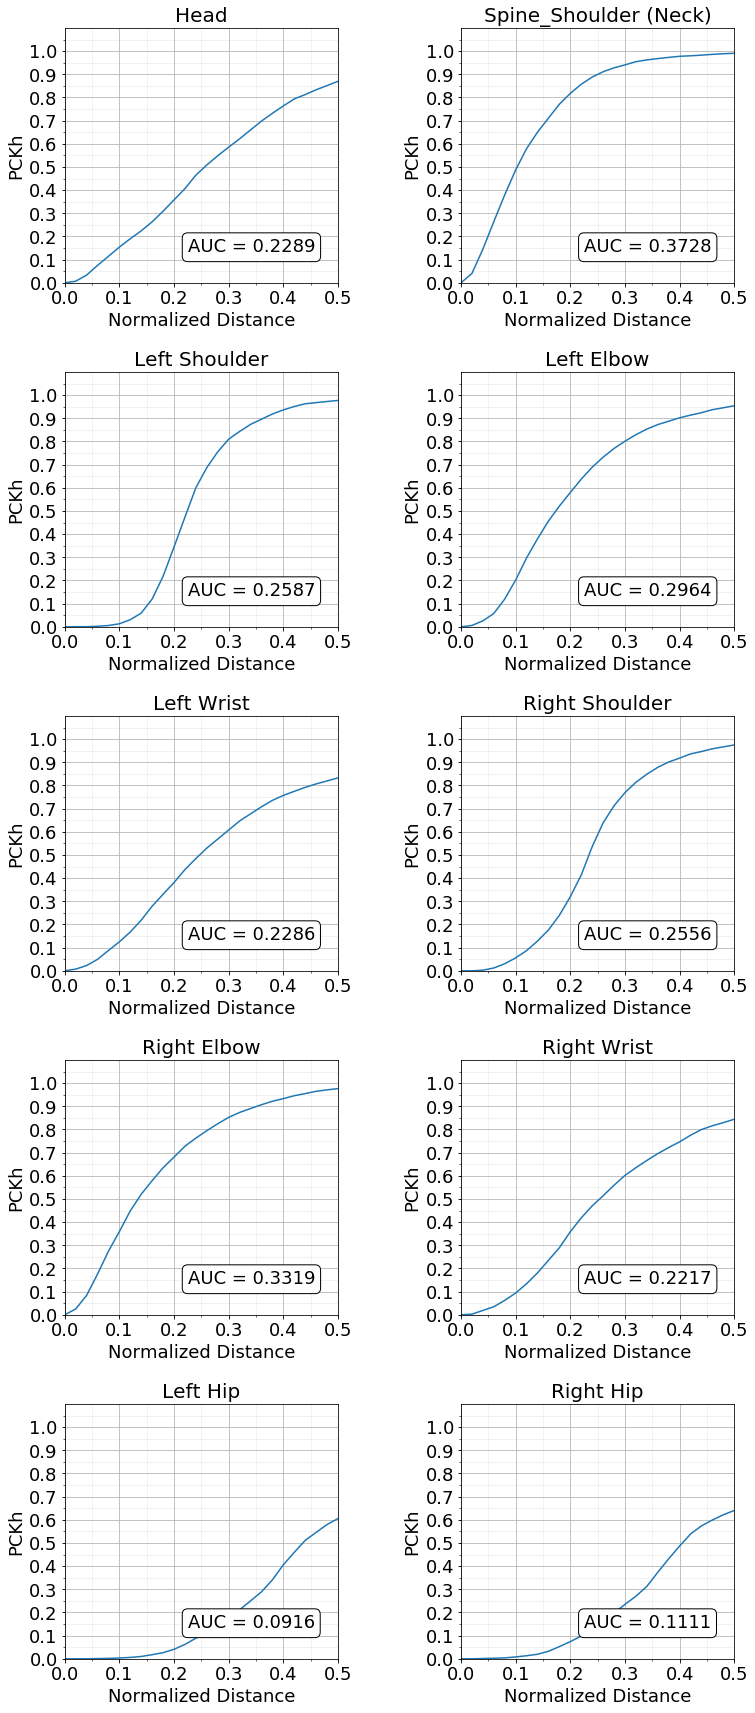

In [9]:
##### pckh
fig, ax = plt.subplots(nrows=5, ncols=2)
print(ax.shape)
fig.set_size_inches((12, 30))
fig.subplots_adjust(wspace=0.45)
fig.subplots_adjust(hspace=0.35)

x = pckh_at
x_label = "Normalized Distance"
y_label = "PCKh"

i = -1
for p in range(pckh.shape[0]):
    j = p%2  # 2 columns
    if j == 0:
        i = i + 1
    print("i, j", i, j)
    
    y = pckh[p]

    # Major ticks every .1, minor ticks every .05
    major_ticks = np.arange(0, 1.1, .1)
    minor_ticks = np.arange(0, 1.1, .05)

    ax[i][j].set_xticks(major_ticks)
    ax[i][j].set_xticks(minor_ticks, minor=True)
    ax[i][j].set_yticks(major_ticks)
    ax[i][j].set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax[i][j].grid(which='both')

    # Or if you want different settings for the grids:
    ax[i][j].grid(which='minor', alpha=0.2)
    ax[i][j].grid(which='major', alpha=0.9)

    auc = round(metrics.auc(x, y), precision)
    x_label = "Normalized Distance"  # + " | AUC = " + str(auc)
    
    ax[i][j].plot(x, y)
    ax[i][j].set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title=joints[p])
    ax[i][j].grid(linestyle = '-')
    
    ax[i][j].annotate("AUC = " + str(auc), xy=(0.45, 0.12), xycoords='axes fraction',
             fontsize=SMALLER_SIZE, bbox=dict(boxstyle="round", fc="w"))
    
# fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pckh.split('.')[0] + "_individual_joints.png"))

mean pck [0.      0.00882 0.03332 0.06736 0.108   0.15016 0.1955  0.23922 0.2871
 0.33932 0.39554 0.45324 0.51128 0.55902 0.60068 0.6376  0.67    0.6995
 0.72874 0.7565  0.7828  0.80692 0.82612 0.8416  0.85472 0.86666] (26,)
Area under the curve 0.2397


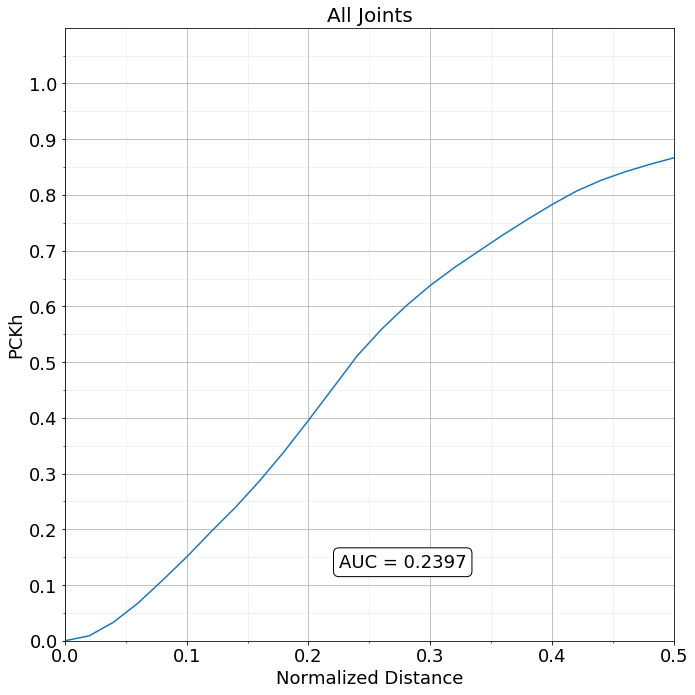

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 10))

x = pckh_at

# Major ticks every .1, minor ticks every .05
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .05)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.9)

# 1 all joints
y = np.mean(pckh, axis=0)
print("mean pck", y, y.shape)
auc = round(metrics.auc(x, y), precision)
print("Area under the curve", auc)

x_label = "Normalized Distance"  # + " | AUC = " + str(auc)
y_label = "PCKh"

ax.plot(x, y)
ax.set(xlabel=x_label, ylabel=y_label, xlim=[0, 0.5], ylim=[0, 1.1], title='All Joints')
ax.grid(linestyle = '-')

ax.annotate("AUC = " + str(auc), xy=(0.45, 0.12), xycoords='axes fraction',
             fontsize=SMALLER_SIZE, bbox=dict(boxstyle="round", fc="w"))
    
fig.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, npy_file_pckh.split('.')[0] + "_all_AUC_" + str(auc) + ".png"))
